In [ ]:
#importing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [4]:
#load data

stock_data = pd.read_csv('GOOG.csv',parse_dates=True , index_col="date")
stock_data

,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,,
2016-06-14 00:00:00+00:00,GOOG,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
2016-06-15 00:00:00+00:00,GOOG,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2016-06-16 00:00:00+00:00,GOOG,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
2016-06-17 00:00:00+00:00,GOOG,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
2016-06-20 00:00:00+00:00,GOOG,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-07 00:00:00+00:00,GOOG,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
2021-06-08 00:00:00+00:00,GOOG,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
2021-06-09 00:00:00+00:00,GOOG,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0


In [5]:
stock_data.head()

,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,,
2016-06-14 00:00:00+00:00,GOOG,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
2016-06-15 00:00:00+00:00,GOOG,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2016-06-16 00:00:00+00:00,GOOG,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
2016-06-17 00:00:00+00:00,GOOG,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
2016-06-20 00:00:00+00:00,GOOG,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [6]:
stock_data.tail()

,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,,
2021-06-07 00:00:00+00:00,GOOG,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
2021-06-08 00:00:00+00:00,GOOG,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
2021-06-09 00:00:00+00:00,GOOG,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
2021-06-10 00:00:00+00:00,GOOG,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0
2021-06-11 00:00:00+00:00,GOOG,2513.93,2526.990,2498.2900,2524.92,1262309,2513.93,2526.990,2498.2900,2524.92,1262309,0.0,1.0


In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2016-06-14 00:00:00+00:00 to 2021-06-11 00:00:00+00:00
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   close        1258 non-null   float64
 2   high         1258 non-null   float64
 3   low          1258 non-null   float64
 4   open         1258 non-null   float64
 5   volume       1258 non-null   int64  
 6   adjClose     1258 non-null   float64
 7   adjHigh      1258 non-null   float64
 8   adjLow       1258 non-null   float64
 9   adjOpen      1258 non-null   float64
 10  adjVolume    1258 non-null   int64  
 11  divCash      1258 non-null   float64
 12  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 137.6+ KB


In [11]:
stock_data.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [12]:
stock_data.isna().sum()

symbol         0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

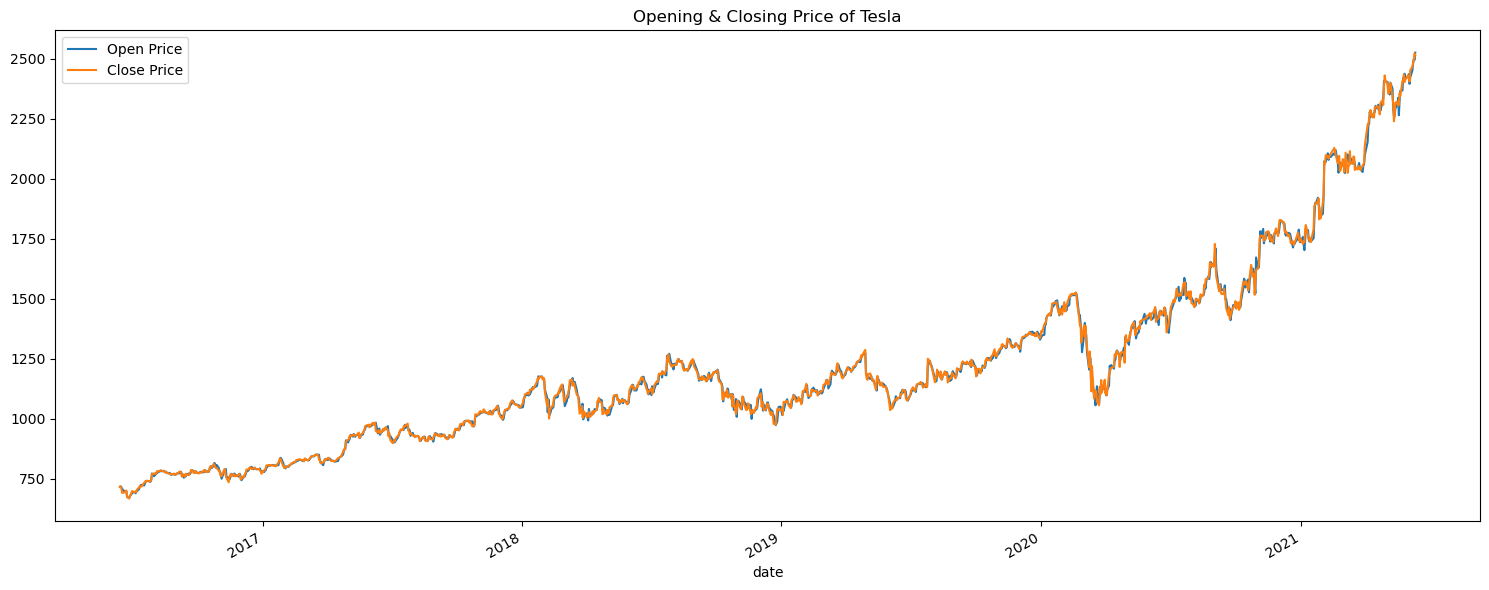

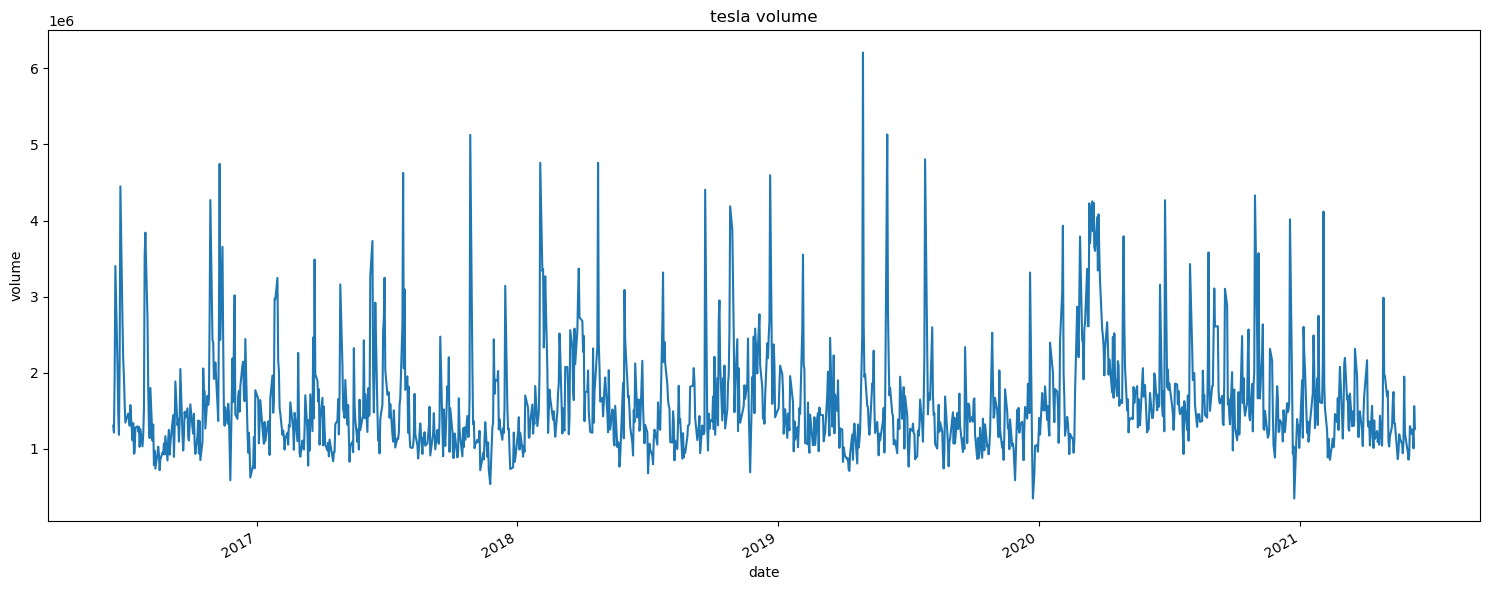

In [14]:
train_size = int(len(stock_data)*0.75)
test_size = len(stock_data)-train_size

plt.figure(figsize=(15,6))
stock_data['open'].plot()
stock_data['close'].plot()
plt.title('Opening & Closing Price of Tesla')
plt.legend(['Open Price','Close Price'])
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,6))
stock_data['volume'].plot()
plt.ylabel('volume')
plt.title('tesla volume')
plt.tight_layout()
plt.show()

In [15]:
#preprocessing Data

dataset=stock_data['close']
dataset = pd.DataFrame(dataset)

data=dataset.values

data.shape

sc = MinMaxScaler(feature_range=(0,1))
scaled_data = sc.fit_transform(np.array(data).reshape(-1,1))

train_size = int(len(data)*0.75)
test_size = len(data)-train_size

print(f'Train Size :{train_size}, Test size {test_size}')



train_data = scaled_data[:train_size,0:1] # 0->2217
test_data = scaled_data[train_size-60:,0:1] #

X_train = []
y_train = []

for i in range(60,len(train_data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

X_train , y_train = np.array(X_train),np.array(y_train)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

Train Size :943, Test size 315


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
28/28 [==============================] - 50s 394ms/step - loss: 0.0107 - mean_absolute_error: 0.0752
Epoch 2/200
28/28 [==================

28/28 [==============================] - 10s 360ms/step - loss: 1.3400e-04 - mean_absolute_error: 0.0086
Epoch 63/200
28/28 [==============================] - 8s 272ms/step - loss: 1.2814e-04 - mean_absolute_error: 0.0084
Epoch 64/200
28/28 [==============================] - 9s 332ms/step - loss: 1.4986e-04 - mean_absolute_error: 0.0091
Epoch 65/200
28/28 [==============================] - 10s 354ms/step - loss: 1.7755e-04 - mean_absolute_error: 0.0101
Epoch 66/200
28/28 [==============================] - 11s 375ms/step - loss: 1.3351e-04 - mean_absolute_error: 0.0087
Epoch 67/200
28/28 [==============================] - 9s 310ms/step - loss: 1.5373e-04 - mean_absolute_error: 0.0093
Epoch 68/200
28/28 [==============================] - 7s 249ms/step - loss: 1.3287e-04 - mean_absolute_error: 0.0086
Epoch 69/200
28/28 [==============================] - 8s 286ms/step - loss: 1.3468e-04 - mean_absolute_error: 0.0087
Epoch 70/200
28/28 [==============================] - 6s 212ms/step - loss

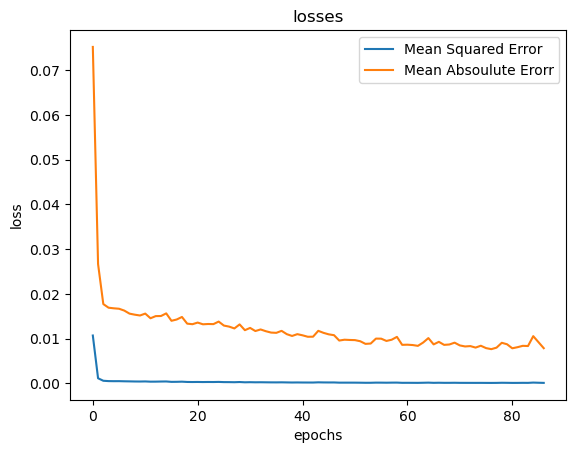

10/10 [==============================] - 7s 61ms/step


In [16]:
#Model & Building & Training

regressor = Sequential()

regressor.add(LSTM(units=50,return_sequences=True,input_shape = (X_train.shape[1],1)))


regressor.add(LSTM(units=50,return_sequences=True))



regressor.add(LSTM(units=50))


regressor.add(Dense(units=1))

regressor.compile(optimizer='adam',loss='mse',metrics='mean_absolute_error')


regressor.summary()

callbacks = [EarlyStopping(monitor='loss',patience=10,restore_best_weights=True)]
history = regressor.fit(X_train,y_train,epochs = 200,batch_size=32,callbacks=callbacks)

#Model Evaluation


plt.plot(history.history['loss'])
plt.plot(history.history['mean_absolute_error'])
plt.legend(['Mean Squared Error','Mean Absoulute Erorr'])
plt.title('losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()


x_test = []
y_test = []

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    y_test.append(test_data[i,0])
x_test= np.array(x_test)
y_test=np.array(y_test)


x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
prediction = regressor.predict(x_test)

prediction = sc.inverse_transform(prediction)
prediction.shape

y_test = sc.inverse_transform([y_test])

RMSE = np.sqrt(np.mean(y_test-prediction)**2)
RMSE

train = dataset.iloc[:train_size,0:1]
test = dataset.iloc[train_size:,0:1]

test['Prediction']=prediction



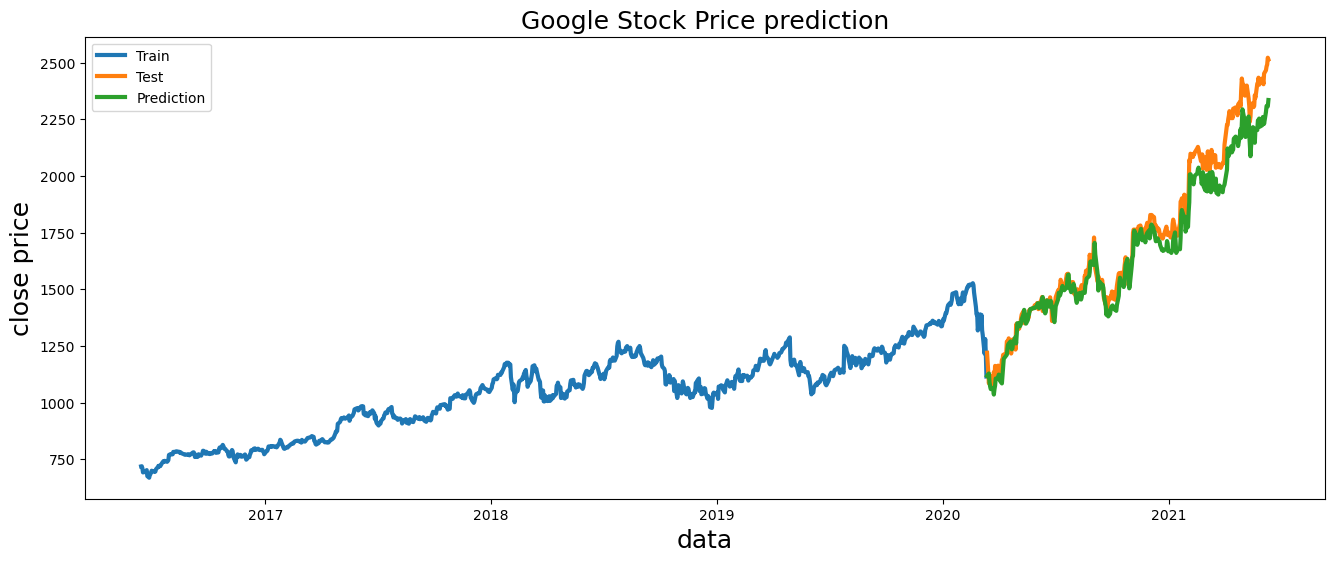

In [18]:
plt.figure(figsize=(16,6))
plt.title('Google Stock Price prediction',fontsize=18)
plt.xlabel('data',fontsize=18)
plt.ylabel('close price',fontsize=18)
plt.plot(train['close'],linewidth=3)
plt.plot(test['close'],linewidth=3)
plt.plot(test['Prediction'],linewidth=3)
plt.legend(['Train','Test','Prediction'])
plt.show()
